# Descriptive Analytics for Numerical Columns
### To compute and analyze basic statistical measures for numerical columns in the dataset.

In [1]:
import pandas as pd

### Load the dataset into a data analysis tool or programming environment 

In [2]:
df=pd.read_csv('sales_data_with_discounts.csv')
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


### Identify numerical columns in the dataset.

In [4]:
num_col=df.select_dtypes(include=['number']).columns
print('Numerical Columns:',num_col)

Numerical Columns: Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')


### Calculate the mean, median, mode, and standard deviation for these columns.

In [5]:
df[num_col].mean()

Volume                   5.066667
Avg Price            10453.433333
Total Sales Value    33812.835556
Discount Rate (%)       15.155242
Discount Amount       3346.499424
Net Sales Value      30466.336131
dtype: float64

In [6]:
df[num_col].median()

Volume                  4.000000
Avg Price            1450.000000
Total Sales Value    5700.000000
Discount Rate (%)      16.577766
Discount Amount       988.933733
Net Sales Value      4677.788059
dtype: float64

In [7]:
df[num_col].mode().iloc[0]

Volume                   3.000000
Avg Price              400.000000
Total Sales Value    24300.000000
Discount Rate (%)        5.007822
Discount Amount         69.177942
Net Sales Value        326.974801
Name: 0, dtype: float64

In [8]:
df[num_col].std()

Volume                   4.231602
Avg Price            18079.904840
Total Sales Value    50535.074173
Discount Rate (%)        4.220602
Discount Amount       4509.902963
Net Sales Value      46358.656624
dtype: float64

### Provide a brief interpretation of these statistics.

-The dataset is loaded using pandas.

-The first few rows are displayed to understand the structure.

-The info() function provides an overview of the data types and missing values.

-select_dtypes(include=['number']) filters numerical columns.

-The mean gives the central tendency of the dataset.

-The standard deviation indicates the variability in data.

-Mode helps in understanding the most frequently occurring values.

-Skewness and outliers can be identified by comparing mean and median.

# Data Visualization
### To visualize the distribution and relationship of numerical and categorical variables in the dataset.

In [9]:
import matplotlib.pyplot as plt

## Histograms
#### Plot histograms for each numerical column.

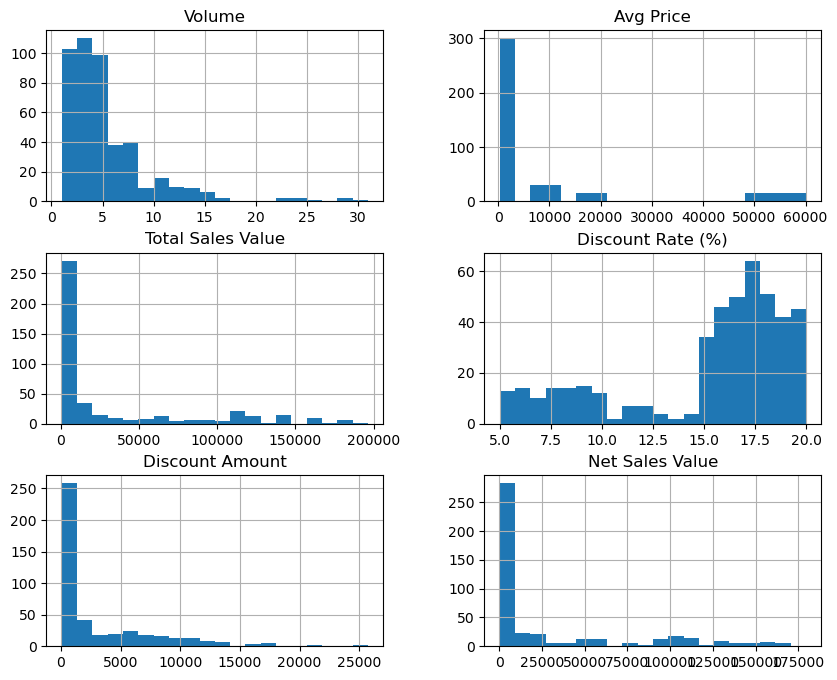

In [10]:
df[num_col].hist(figsize=(10,8), bins=20)
plt.show()

#### Analyze the distribution (e.g., skewness, presence of outliers) and provide inferences.

Volume: right skewed, outliers on higher end

Avg Price: right skewed, outliers on higher end

Total Sales Value: right skewed, outliers on higher end

Discount Rate(%): left skewed, outliers on lower end

Discount Amount: right skewed, outliers on higher end

Net Sales Value: right skewed, outliers on higher end


In [11]:
import seaborn as sns

## Boxplots
#### Create boxplots for numerical variables to identify outliers and the interquartile range.

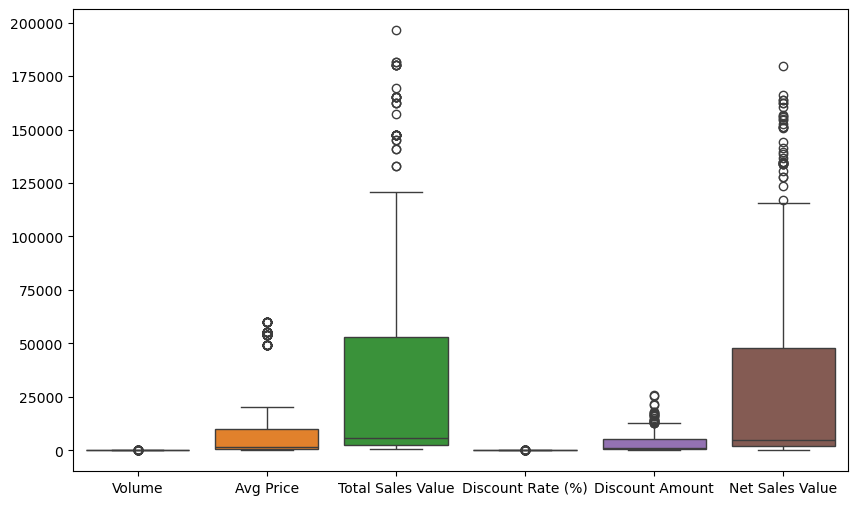

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[num_col])
plt.show()

### Discuss any findings, such as extreme values or unusual distributions.
###### Volume: Outliers are present both high and low. Distribution is Relatively symmetrical,potential skewness
###### Avg Price: outliers are present at high, Right skewed
###### Total Sales Value: outliers are present at high, heavily Right skewed
###### Discount Rate(%): No outliers ,Relatively uniform
###### Discount Amount: outliers are present at high, Right skewed
###### Net Sales Value: outliers are present at high, Right skewed

## Bar Chart Analysis for Categorical Column
#### Identify categorical columns in the dataset.

In [13]:
cat_col=df.select_dtypes(include=['object']).columns
print(cat_col)

Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')


#### Create bar charts to visualize the frequency or count of each category.

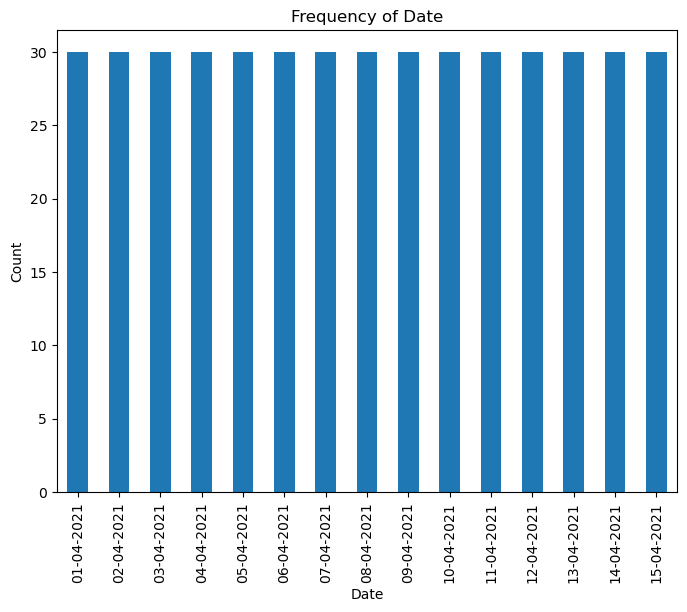

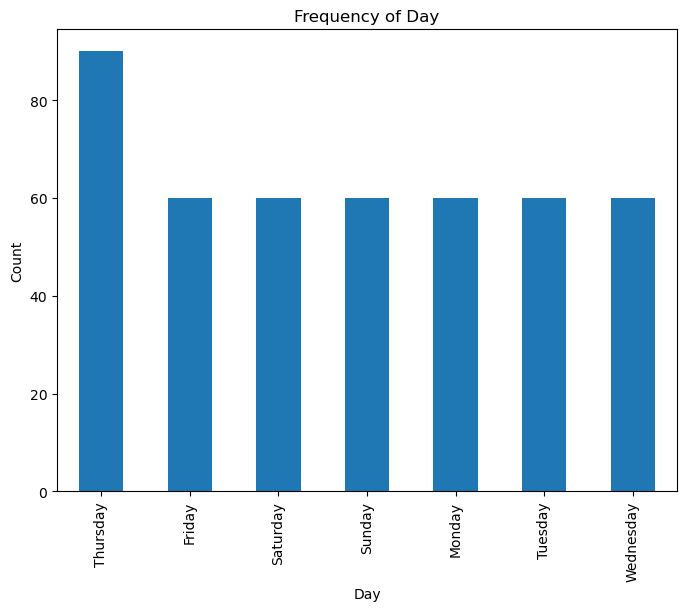

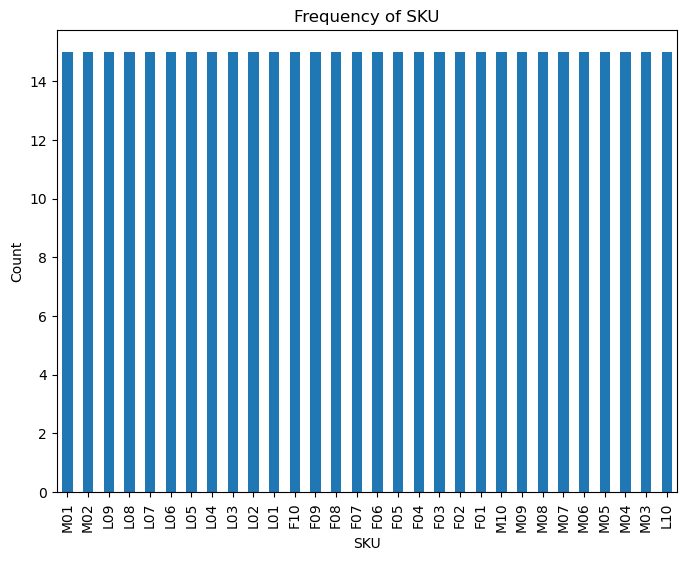

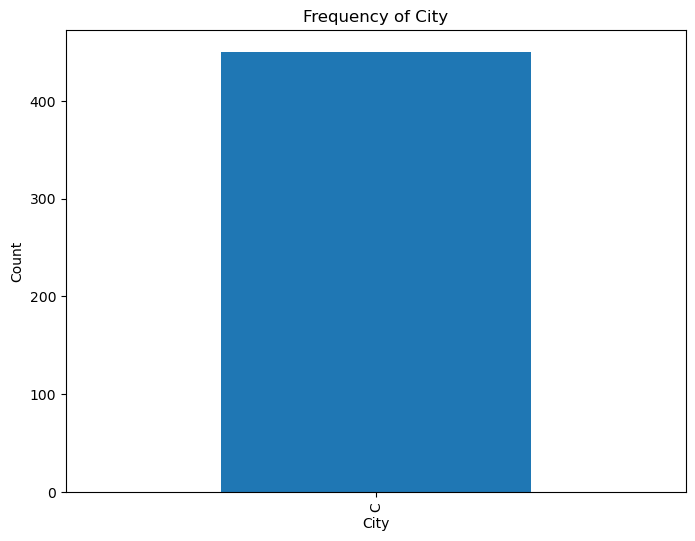

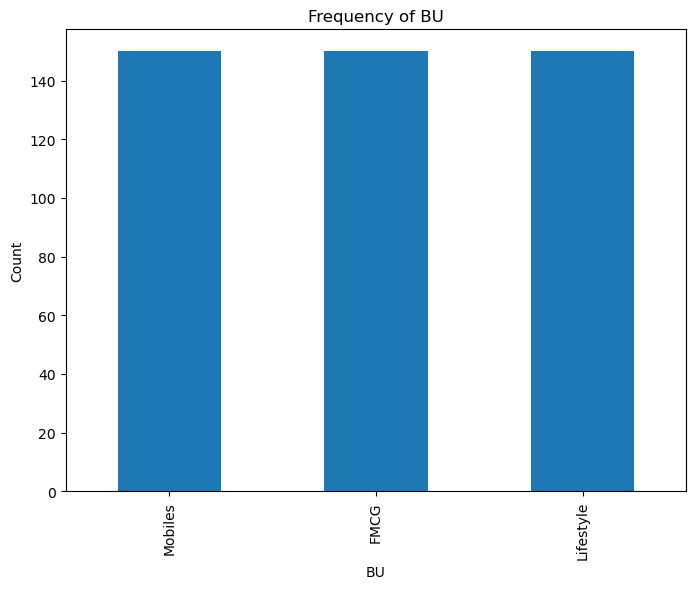

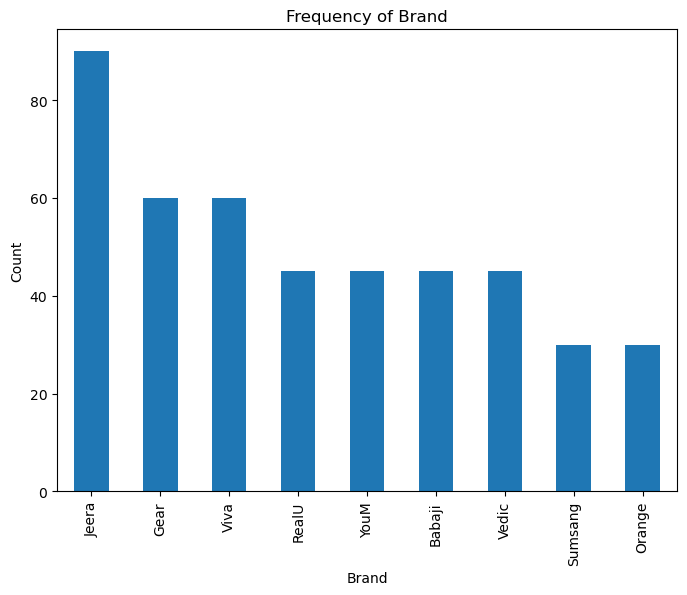

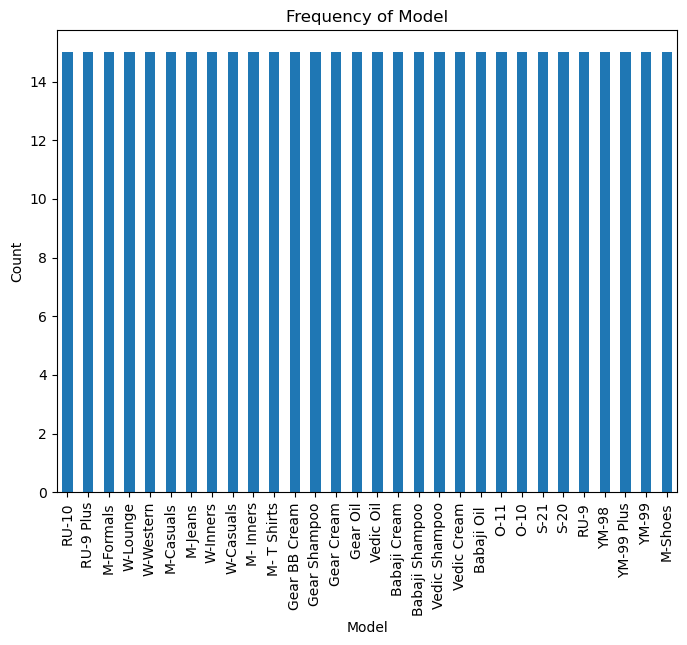

In [14]:
for col in cat_col:
    plt.figure(figsize=(8,6))
    df[col].value_counts().plot(kind='bar')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(f"Frequency of {col}")
    plt.show()

#### Analyze the distribution of categories and provide insights.

Date: Uniform Distribution, No Outliers

Day: Peak in activity on Thursday and stable level of activity on other weekdays and the distribution is not uniform

SKU: No Outliers and Uniform Distribution

City: Homogeneous and absense of other cities

BU: consistent frequency and no outliers

Brand: Jeera holds dominant market share. gear,viva,realu,YouM similar level of market. babji,vedic,sumsan,orange with smaller market

Model: Uniform Distribution and lack of skewness

# Standardization of Numerical Variables
### To scale numerical variables for uniformity, improving the dataset’s suitability for analytical models

#### Concept of Standardization (Z-score Normalization)

Standardization (also known as Z-score normalization) transforms data so that it has a mean of 0 and a standard deviation of 1. This is useful for ensuring that all numerical variables are on the same scale, which improves the performance of machine learning algorithms.

The formula for standardization is:z=x-mu/sigma

Where:

x is the original value

mu is the mean of the column

sigma is the standard deviation

In [15]:
from sklearn.preprocessing import StandardScaler

### Show before and after comparisons of the data distributions.
##### Before Standardization

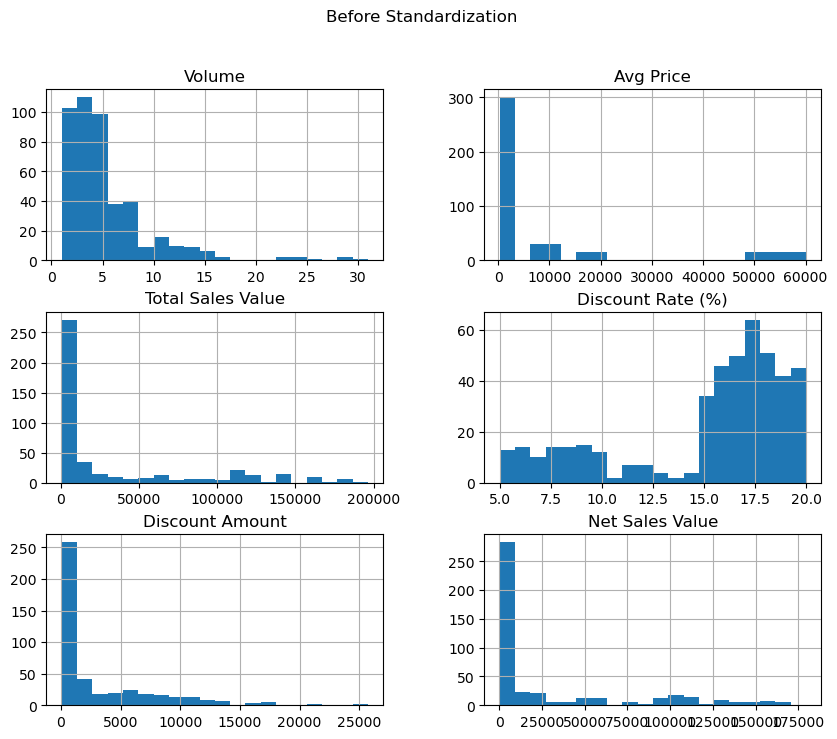

In [16]:
df[num_col].hist(figsize=(10,8), bins=20)
plt.suptitle("Before Standardization")
plt.show()

##### Apply standardization

In [17]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[num_col]), columns=num_col)
print(df_scaled.head())

     Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0  2.350029   0.091173           2.925721          -0.830289         3.952816   
1  1.167129  -0.019570           1.330995          -0.852661         1.849014   
2  0.457388   0.312659           1.562775          -1.351631         1.622995   
3  0.220808   0.534146           1.719276          -1.949723         1.113807   
4 -0.488932  -0.130313          -0.188452           0.673739         0.227852   

   Net Sales Value  
0         2.804756  
1         1.271026  
2         1.545675  
3         1.765810  
4        -0.227595  


##### After standardization

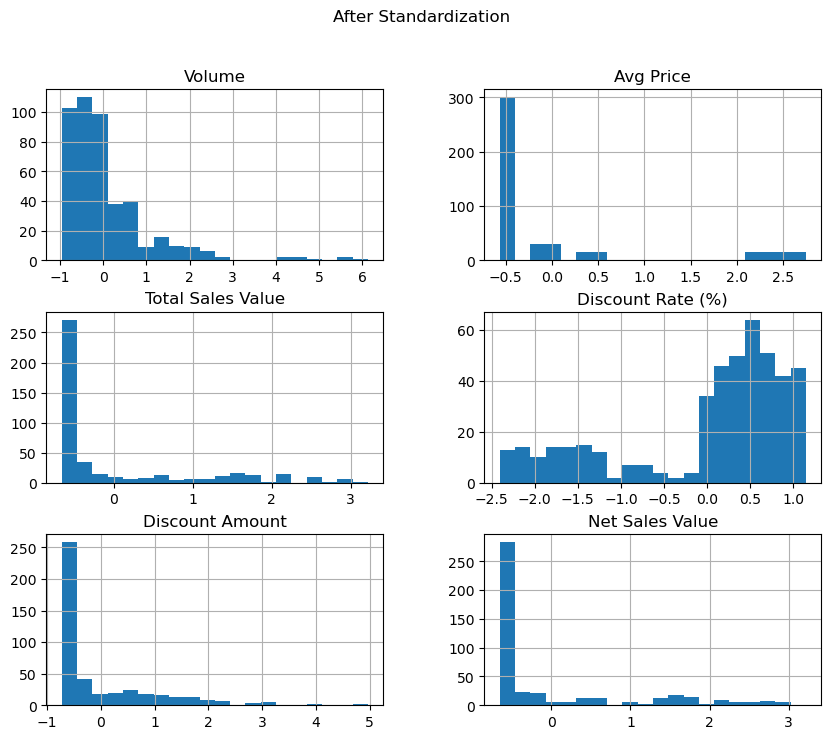

In [18]:
df_scaled.hist(figsize=(10,8), bins=20)
plt.suptitle("After Standardization")
plt.show()

# Conversion of Categorical Data into Dummy Variables
### To transform categorical variables into a format that can be provided to ML algorithms.

#### Discuss the need for converting categorical data into dummy variables (one-hot encoding).
Machine learning models typically require numerical input, and categorical variables cannot be directly processed. One-hot encoding transforms categorical columns into a set of binary (0 or 1) variables, ensuring that models can correctly interpret categorical distinctions without introducing an ordinal relationship.

#### Apply one-hot encoding to the categorical columns, creating binary (0 or 1) columns for each category

In [19]:
df_encoded = pd.get_dummies(df, columns=cat_col, drop_first=True)
print(df_encoded.head())

   Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  Date_02-04-2021  Date_03-04-2021  Date_04-04-2021  \
0    160346.501180            False            False            False   
1     89323.897039            False            False            False   
2    102042.089843            False            False            False   
3    112235.925298            False            False            False   
4     19927.053770            False            False            False   

   Date_05-04-2021  ...  Model_Vedic Cream  Model_Vedic Oil  \
0            False  ...

One-hot encoding converts categorical variables into binary columns.

drop_first=True prevents multicollinearity by removing the first category in each column.

The transformed dataset is displayed to verify the encoding process.

# Conclusion

The dataset has been explored and analyzed using descriptive statistics and visualizations.

Histograms and boxplots helped identify data distributions and outliers.

Bar charts provided insights into categorical data distributions.

Standardization ensured numerical data is normalized for further analysis.

One-hot encoding prepared categorical variables for machine learning models.